In [2]:
# Install Libraries
!pip install pycaret
!pip install markupsafe==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.2 MB/s 
     |████████████████████████████████| 262 kB 54.8 MB/s 
     |████████████████████████████████| 3.3 MB 51.0 MB/s 
     |████████████████████████████████| 17.0 MB 36.7 MB/s 
     |████████████████████████████████| 134 kB 60.2 MB/s 
     |████████████████████████████████| 167 kB 69.7 MB/s 
     |████████████████████████████████| 25.9 MB 1.3 MB/s 
     |████████████████████████████████| 6.8 MB 19.4 MB/s 
     |████████████████████████████████| 1.7 MB 72.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 39.8 MB/s 
     |████████████████████████████████| 10.4 MB 27.3 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |███████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires markupsafe~=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [3]:
# Make sure pycarete knows we are in colab
from pycaret.utils import enable_colab
enable_colab

<function pycaret.utils.enable_colab()>

In [35]:
#Load in the dataset
import pandas as pd
df=pd.read_csv(r'/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [36]:
#Split data into test and train data
data=df.sample(frac=0.95, random_state=786)
data_unseen=df.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print("Data for Modeling:" +str (data.shape))
print("Unseen Data for Predictions:" + str (data_unseen.shape))

Data for Modeling:(1396, 35)
Unseen Data for Predictions:(74, 35)


In [37]:
#Identify the total attrition percentage
data['Attrition'].value_counts()/len(data)

No     0.838109
Yes    0.161891
Name: Attrition, dtype: float64

In [38]:
#Download Classification 
from pycaret.classification import *
exp_clf101= setup(data= data,target="Attrition", session_id=123)

,Description,Value
0,session_id,123
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(1396, 35)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,25
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Attrition',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_st...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [26]:
#Pick the best model to use
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.8710,0.8304,0.5451,0.6699,0.5936,0.5187,0.5269,0.108
ridge,Ridge Classifier,0.8690,0.0000,0.4180,0.7285,0.5234,0.4550,0.4821,0.020
lightgbm,Light Gradient Boosting Machine,0.8649,0.8204,0.3307,0.7883,0.4546,0.3938,0.4468,0.137
lr,Logistic Regression,0.8629,0.8160,0.3935,0.7099,0.4889,0.4206,0.4516,0.785
gbc,Gradient Boosting Classifier,0.8608,0.8367,0.3601,0.7130,0.4650,0.3979,0.4338,0.420
ada,Ada Boost Classifier,0.8536,0.7853,0.4301,0.6345,0.5069,0.4253,0.4392,0.182
et,Extra Trees Classifier,0.8475,0.8230,0.1683,0.8400,0.2751,0.2313,0.3275,0.510
rf,Random Forest Classifier,0.8414,0.8099,0.1219,0.8667,0.2097,0.1744,0.2810,0.563
dummy,Dummy Classifier,0.8240,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.013
knn,K Neighbors Classifier,0.7984,0.5827,0.0935,0.2729,0.1374,0.0565,0.0662,0.126


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)
INFO:logs:compare_models() succesfully completed......................................


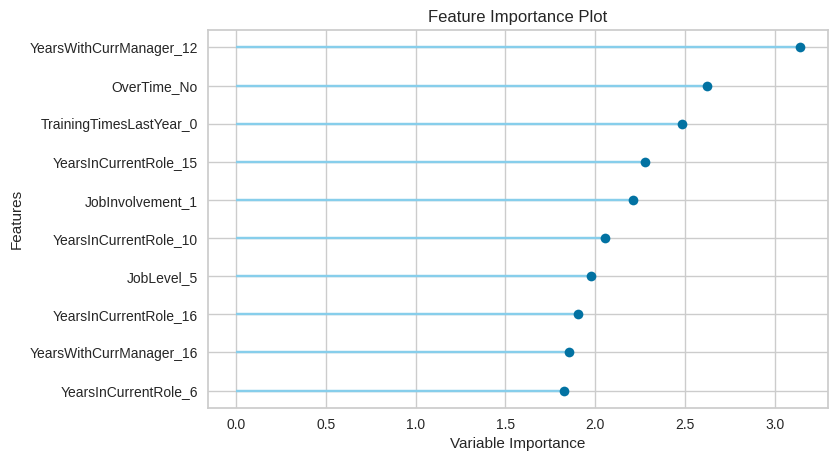

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [28]:
#Load model to see which features are most important
model=create_model('lda')
plot_model(model,plot='feature')

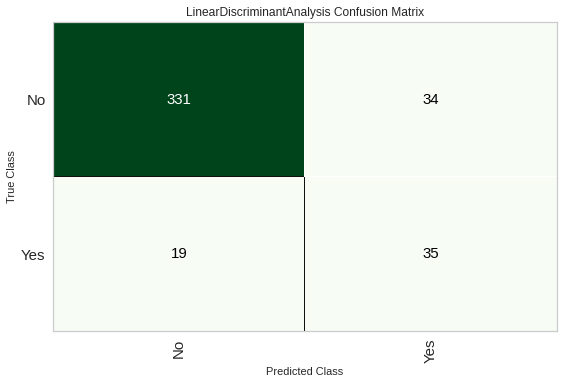

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
#See what we predicted wrong and right. Answers teh question on are the effort to retain employees working?
plot_model(model,plot='confusion_matrix')

In [34]:
#Check if model worked well for unseen data
unseen_predictions= predict_model(model, data=data_unseen)
from pycaret.utils import check_metric
check_metric(unseen_predictions["Attrition"], unseen_predictions['Label'], metric= "Accuracy")

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0,0.6984,0,0,0,0,0


0.8784